# Thesis Outcomes

In this notebook I will compare the result I got from all the algorithms I implemented.

I will start by comparing both packing methods with each other. Then i will be comparing the Mean, followed by the Inner Product, and finish with the Variance.

For all the algorithms I am working with vector of size n = 8192 which are always filled with exactly 8192 values which can be 1, 2 or 3.


## Setup


In [1]:
# Imports
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function to extract files from folder
def get_files(filepath):
    all_files = []
    for root, dirs, files in os.walk(filepath):
            files = glob.glob(os.path.join(root, '*.csv'))
            for f in files:
                    all_files.append(os.path.abspath(f))
    return all_files

In [5]:
# Get file names
outcomes_CSV = get_files("../timeCSVs")

# Import csv as a Dataframe
variance_DF = pd.read_csv(outcomes_CSV[4])

In [6]:
# Auxiliary Functions

def compare_two_types_by_percentage(column1, column2, df):
    return ((df.loc[df['Type'] == column2]['Average'].values[0] - df.loc[df['Type'] == column1]['Average'].values[0] )/ df.loc[df['Type'] == column2]['Average'].values[0]) * 100

def create_df_for_type(type, setup_averages, encryption_averages, homomorphic_averages):
    df = pd.DataFrame(columns=['Time'], index=['Setup', 'Encryption', 'Homomorphic'])

    df.loc['Setup'] = float(format(setup_averages[setup_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Encryption'] = float(format(encryption_averages[encryption_averages['Type'] == type]['Average'].values[0], ".2f"))
    df.loc['Homomorphic'] = float(format(homomorphic_averages[homomorphic_averages['Type'] == type]['Average'].values[0], ".2f"))

    return df

## Variance

For the variance I have 2 types of implementation.

The first algorithm is an expansion of the original formula of the variance.

The second comes from a paper.


In [7]:
variance_DF['type'].unique()

array(['deduced-slot', 'wu-haven-slot', 'half-size-wu-haven-coef',
       'wu-haven-coef', 'deduced-coef'], dtype=object)

In [17]:
### Create DF for each type of implementation
deduced_slot_DF = variance_DF[variance_DF['type'] == "deduced-slot"]
deduced_coef_DF = variance_DF[variance_DF['type'] == "deduced-coef"]
wu_have_slot_DF = variance_DF[variance_DF['type'] == "wu-haven-slot"]
wu_have_coef_DF = variance_DF[variance_DF['type'] == "wu-haven-coef"]
half_size_wu_haven_coef_DF = variance_DF[variance_DF['type'] == "half-size-wu-haven-coef"]

implementation_dfs = {'deduced_slot': deduced_slot_DF,
                      'deduced_coef': deduced_coef_DF, 
                      'wu_haven_slot': wu_have_slot_DF,
                      'wu_haven_coef': wu_have_coef_DF,
                      'half_size_wu_haven_coef': half_size_wu_haven_coef_DF}

### Total Time Comparison


In [18]:
total_time_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    total_time_averages.loc[len(total_time_averages)] = {'Type': name, 'Average': df[' total'].mean()}

In [19]:
total_time_averages

,Type,Average
0,deduced_slot,470.393
1,deduced_coef,119.160
2,wu_haven_slot,474.829
3,wu_haven_coef,134.180
4,half_size_wu_haven_coef,287.556


[Text(0, 0, '470.393'),
 Text(0, 0, '119.16'),
 Text(0, 0, '474.829'),
 Text(0, 0, '134.18'),
 Text(0, 0, '287.556')]

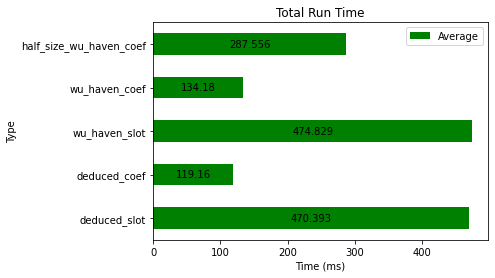

In [20]:
ax = total_time_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Total Run Time')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')


In [26]:
# Compare both slot implementation
deduced_slot_vs_wu_haven_slot = format(compare_two_types_by_percentage("deduced_slot", "wu_haven_slot", total_time_averages),
                             ".2f")

# Compare Coef
deduced_coef_vs_wu_haven_coef = format(compare_two_types_by_percentage("deduced_coef", "wu_haven_coef", total_time_averages),
                               ".2f")

# Compare wu haven Coef vs half size wu haven
wu_haven_coef_vs_half_size_wu_haven_coef = format(compare_two_types_by_percentage("wu_haven_coef", "half_size_wu_haven_coef", total_time_averages),
                               ".2f")

# Compare wu haven coef vs  slot implementation
wu_haven_coef_vs_wu_haven_slot = format(compare_two_types_by_percentage("wu_haven_coef", "wu_haven_slot", total_time_averages),
                             ".2f")

# Compare deduced Coef vs slot
deduced_coef_vs_deduced_coef = format(compare_two_types_by_percentage("deduced_coef", "deduced_slot", total_time_averages),
                               ".2f")


### Time per phase


I divided the algorithms in 5 phases: setup, encryption, homomorphic operations, decryption, plaintext operations.

The Setup Time includes the time it takes to generate all the parameters needed, generate the rotation keys needed, and the time it takes to pre process the values.

The Encryption is the time it takes to encrypt all the needed ciphertexts.

The Homomorphic Operation is the time it takes to execute all the homomorphic operations needed.

The Decryption is the time it takes to decrypt all the ciphertexts. Since we end up only decrypting one ciphertext, I don't use time for comparison.

The Plaintext Operation is the time it takes to execute all the operations over plaintexts. This is also not gonna be used because i would only do, at most, 1 plaintext operation and since it is plaintext it is the always the same value (it is not influenced by homomorphic scheme or packing type)


In [22]:
### Create a DataFrame for each phase with the average of each type of algorithm

# Setup
setup_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    setup_averages.loc[len(setup_averages)] = {'Type': name, 'Average': df[' setup'].mean()}

# Encryption
encryption_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    encryption_averages.loc[len(encryption_averages)] = {'Type': name, 'Average': df[' encryption'].mean()}

# Homomorphic
homomorphic_averages = pd.DataFrame({'Type': pd.Series(dtype='str'),
                                    'Average': pd.Series(dtype='float')})

for name, df in implementation_dfs.items():
    homomorphic_averages.loc[len(homomorphic_averages)] = {'Type': name, 'Average': df[' homomorphic'].mean()}

In [23]:
homomorphic_averages

,Type,Average
0,deduced_slot,162.272
1,deduced_coef,25.274
2,wu_haven_slot,173.360
3,wu_haven_coef,29.809
4,half_size_wu_haven_coef,91.863


In [35]:
# Setup Operations Comparison

# Compare wu haven Coef vs Slot
setup_wu_haven_coef_vs_slot = format(compare_two_types_by_percentage("wu_haven_coef", "wu_haven_slot", setup_averages),
                               ".2f")

# Compare deduced Coef vs Slot
setup_deduced_coef_vs_slot = format(compare_two_types_by_percentage("deduced_coef", "deduced_slot", setup_averages),
                               ".2f")

# Compare wu haven Coef vs Half size
setup_wu_haven_coef_vs_half_size = format(compare_two_types_by_percentage("wu_haven_coef", "half_size_wu_haven_coef", setup_averages),
                               ".2f")

#                 #
#   Encryption    #
#                 #

# Compare wu haven Coef vs Slot
encryption_wu_haven_coef_vs_slot = format(compare_two_types_by_percentage("wu_haven_slot", "wu_haven_coef", encryption_averages),
                               ".2f")

# Compare deduced Coef vs Slot
encryption_deduced_coef_vs_slot = format(compare_two_types_by_percentage("deduced_slot", "deduced_coef", encryption_averages),
                               ".2f")

# Compare wu haven Coef vs Half size
encryption_wu_haven_coef_vs_half_size = format(compare_two_types_by_percentage("wu_haven_coef", "half_size_wu_haven_coef", encryption_averages),
                               ".2f")

# Compare wu haven Coef vs deducted
encryption_deduced_coef_vs_wu_haven = format(compare_two_types_by_percentage("deduced_coef", "wu_haven_coef", encryption_averages),
                               ".2f")                       

#                  #
#   Homomorphic    #
#                  #

# Compare wu haven Coef vs Slot
homomorphic_wu_haven_coef_vs_slot = format(compare_two_types_by_percentage("wu_haven_coef", "wu_haven_slot", homomorphic_averages),
                               ".2f")

# Compare deduced Coef vs Slot
homomorphic_deduced_coef_vs_slot = format(compare_two_types_by_percentage("deduced_coef", "deduced_slot", homomorphic_averages),
                               ".2f")

# Compare wu haven Coef vs Half size
homomorphic_wu_haven_coef_vs_half_size = format(compare_two_types_by_percentage("wu_haven_coef", "half_size_wu_haven_coef", homomorphic_averages),
                               ".2f")


[Text(50, 0, '162.272'),
 Text(50, 0, '25.274'),
 Text(50, 0, '173.36'),
 Text(50, 0, '29.809'),
 Text(50, 0, '91.863')]

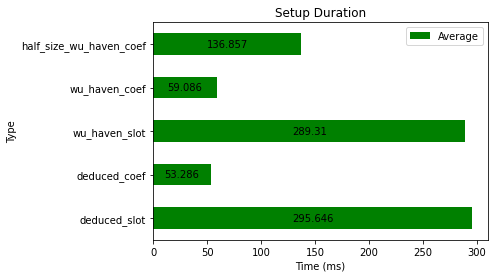

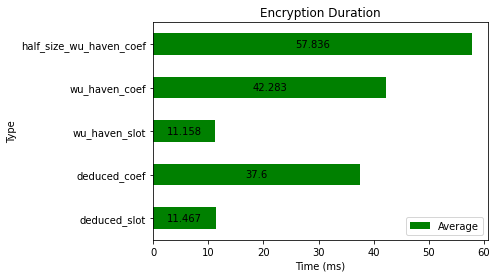

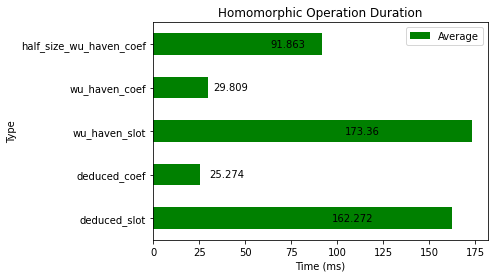

In [31]:
### Plot a graph for each phase

# Setup
ax = setup_averages.plot.barh(x='Type', color='green', title='Setup Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Encryption
ax = encryption_averages.plot.barh(x='Type', color='green', title='Encryption Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center')

# Homomorphic
# Needs two graphs because the values ara in a huge range
ax = homomorphic_averages.plot.barh(x='Type', ylabel='Time (ms)', color='green', title='Homomorphic Operation Duration')
ax.set_xlabel('Time (ms)')
ax.bar_label(ax.containers[0], label_type='center', padding=50)

In [36]:
print("Total Time:")
print("Deduced vs Wu Haven Slot: " + str(deduced_slot_vs_wu_haven_slot) + "%")
print("Deduced vs Wu Haven Coef: " + str(deduced_coef_vs_wu_haven_coef) + "%")
print("Wu Haven Coef vs Half Size: " + str(wu_haven_coef_vs_half_size_wu_haven_coef) + "%")
print("Wu Haven Coef vs Wu Haven Slot: " + str(wu_haven_coef_vs_wu_haven_slot) + "%")
print("Deduced Coef vs Deduced Slot: " + str(deduced_coef_vs_deduced_coef) + "%")

print("\nSetup Operations:")
print("Wu Haven Coef vs Slot: " + str(setup_wu_haven_coef_vs_slot) + "%")
print("Deduced Coef vs Slot: " + str(setup_deduced_coef_vs_slot) + "%")
print("Wu Haven Coef vs Half Size: " + str(setup_wu_haven_coef_vs_half_size) + "%")
print("Wu Haven Coef vs Deduced: " + str(encryption_deduced_coef_vs_wu_haven) + "%")

print("\nEncrypt Operations:")
print("Wu Haven Coef vs Slot: " + str(encryption_wu_haven_coef_vs_slot) + "%")
print("Deduced Coef vs Slot: " + str(encryption_deduced_coef_vs_slot) + "%")
print("Wu Haven Coef vs Half Size: " + str(encryption_wu_haven_coef_vs_half_size) + "%")

print("\nHomomorphic Operations:")
print("Wu Haven Coef vs Slot: " + str(homomorphic_wu_haven_coef_vs_slot) + "%")
print("Deduced Coef vs Slot: " + str(homomorphic_deduced_coef_vs_slot) + "%")
print("Wu Haven Coef vs Half Size: " + str(homomorphic_wu_haven_coef_vs_half_size) + "%")


Total Time:
Deduced vs Wu Haven Slot: 0.93%
Deduced vs Wu Haven Coef: 11.19%
Wu Haven Coef vs Half Size: 53.34%
Wu Haven Coef vs Wu Haven Slot: 71.74%
Deduced Coef vs Deduced Slot: 74.67%

Setup Operations:
Wu Haven Coef vs Slot: 79.58%
Deduced Coef vs Slot: 81.98%
Wu Haven Coef vs Half Size: 56.83%
Wu Haven Coef vs Deduced: 11.08%

Encrypt Operations:
Wu Haven Coef vs Slot: 73.61%
Deduced Coef vs Slot: 69.50%
Wu Haven Coef vs Half Size: 26.89%

Homomorphic Operations:
Wu Haven Coef vs Slot: 82.81%
Deduced Coef vs Slot: 84.42%
Wu Haven Coef vs Half Size: 67.55%


### Conclusion

In terms of setup, the results are as expected, the coefficient algorithms are faster since generating the rotation evaluation keys is very costly when compared to only inverting a vector.

For the encryption, this is where the slot implementation have a better perfomance. For the Wu Haven method, we have that using slot packing is 73,58% faster, while in the deduced method it is 69,5%.

Altough in the half size implementation we have to encrypt twice the number of ciphertexts, compared to the normal implementation, the encryption time is only 26,89% slower.

The times for the homomorphic operations are as expected since coefficient packing's multiplications are way faster than the slot packing.

Although the coefficient packing is slower in the encryption phase, it compensates in the homomorphic operations and in the setup phase.
It is 84,42% faster in the deduced method and 82,81% faster in the Wu Haven mehtod.

All in all, in termos of the algorithms, they are very similiar in terms of perfomance, having a diference of aproximatelly 5ms (independent of being slot or coefficient packing).
The fastest implementations of the algorithms are the ones using coefficient packing.
Using coefficient packing, in the Wu Haven method, is 71,74% faster than using slot packing and, in the deduced method, is 74,67% faster.
